In [39]:
from google.colab import files
files.upload()  # Upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"debeshkumar04","key":"805faf0ad81376aeebe7900e3184b77b"}'}

In [40]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [41]:
!pip install -q kaggle

In [42]:
!kaggle datasets download -d datasnaek/mbti-type

Dataset URL: https://www.kaggle.com/datasets/datasnaek/mbti-type
License(s): CC0-1.0
mbti-type.zip: Skipping, found more recently modified local copy (use --force to force download)


In [43]:
!unzip mbti-type.zip -d ./data

Archive:  mbti-type.zip
replace ./data/mbti_1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./data/mbti_1.csv       


In [44]:
import pandas as pd

df = pd.read_csv('data/mbti_1.csv')
df

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [45]:
# Check shape of the dataset
print("Shape of dataset:", df.shape)

# List column names
print("Columns:", df.columns.tolist())

# View data types
print("\nData types:\n", df.dtypes)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

Shape of dataset: (8675, 2)
Columns: ['type', 'posts']

Data types:
 type     object
posts    object
dtype: object

Missing values:
 type     0
posts    0
dtype: int64


type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64


/tmp/ipython-input-46-1217110611.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette="coolwarm")


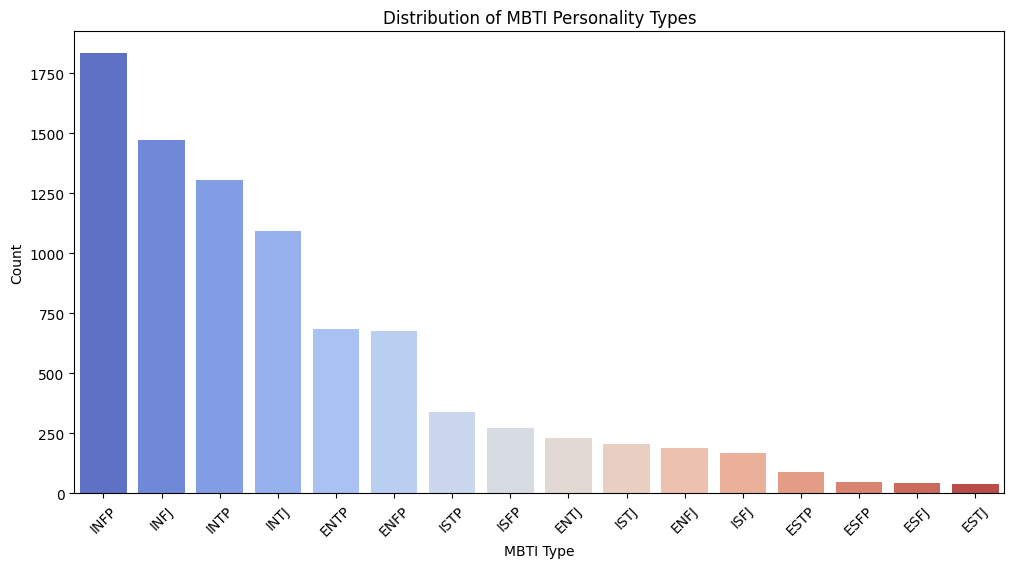

In [46]:
# Frequency count of each MBTI type
type_counts = df['type'].value_counts()
print(type_counts)

# Visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette="coolwarm")
plt.title("Distribution of MBTI Personality Types")
plt.xlabel("MBTI Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [47]:
# View a sample post
print(df['posts'][0])

# Count average number of words per post group
df['post_length'] = df['posts'].apply(lambda x: len(x.split()))
print("Average words per user:", df['post_length'].mean())

# Optional: Split into individual posts (separated by '|||')
df['individual_posts'] = df['posts'].apply(lambda x: x.split('|||'))
print("Sample split posts for one user:")
print(df['individual_posts'][0][:3])  # Show first 3 posts


'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|

In [48]:
df['IE'] = df['type'].apply(lambda x: 1 if x[0] == 'I' else 0)
df['NS'] = df['type'].apply(lambda x: 1 if x[1] == 'N' else 0)
df['TF'] = df['type'].apply(lambda x: 1 if x[2] == 'T' else 0)
df['JP'] = df['type'].apply(lambda x: 1 if x[3] == 'J' else 0)

print(df[['type', 'IE', 'NS', 'TF', 'JP']])

      type  IE  NS  TF  JP
0     INFJ   1   1   0   1
1     ENTP   0   1   1   0
2     INTP   1   1   1   0
3     INTJ   1   1   1   1
4     ENTJ   0   1   1   1
...    ...  ..  ..  ..  ..
8670  ISFP   1   0   0   0
8671  ENFP   0   1   0   0
8672  INTP   1   1   1   0
8673  INFP   1   1   0   0
8674  INFP   1   1   0   0

[8675 rows x 5 columns]


In [49]:
# Count the occurrences of 'T' (1) and 'F' (0) in the 'TF' column
tf_counts = df['TF'].value_counts()

# Rename the index for clarity
tf_counts.index = ['T' if x == 1 else 'F' for x in tf_counts.index]

print("Counts for 'T' and 'F' traits:")
display(tf_counts)

Counts for 'T' and 'F' traits:


,count
F,4694
T,3981


In [50]:
ie_counts = df['IE'].value_counts()

ie_counts.index = ['I' if x == 1 else 'E' for x in ie_counts.index]

print("Counts for 'I' and 'E' traits:")
display(ie_counts)

Counts for 'I' and 'E' traits:


,count
I,6676
E,1999


In [51]:
ns_counts = df['NS'].value_counts()

ns_counts.index = ['N' if x == 1 else 'S' for x in ns_counts.index]

print("Counts for 'N' and 'S' traits:")
display(ns_counts)

Counts for 'N' and 'S' traits:


,count
N,7478
S,1197


In [52]:
jp_counts = df['JP'].value_counts()

# Rename the index for clarity
jp_counts.index = ['J' if x == 1 else 'P' for x in jp_counts.index]

print("Counts for 'J' and 'P' traits:")
display(jp_counts)

Counts for 'J' and 'P' traits:


,count
P,5241
J,3434


In [53]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2025-07-11 06:09:28--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-07-11 06:09:28--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-07-11 06:09:28--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [54]:
import pandas as pd

# Load dataset
#df = pd.read_csv("mbti_1.csv")  # Adjust path if needed

# Extract the TF trait (3rd letter from 'type')
df['TF'] = df['type'].apply(lambda x: x[2])

# Split into Thinking (T) and Feeling (F)
df_T = df[df['TF'] == 'T']
df_F = df[df['TF'] == 'F']

# Shuffle each group to avoid biased ordering within traits
df_T = df_T.sample(frac=1, random_state=42).reset_index(drop=True)
df_F = df_F.sample(frac=1, random_state=42).reset_index(drop=True)

# Interleave them: TTTTFFFTTTTFFF...
interleaved = pd.DataFrame()
T_idx, F_idx = 0, 0
T_chunk, F_chunk = 4, 3  # adjust pattern as needed

while T_idx < len(df_T) or F_idx < len(df_F):
    # Add T chunk
    if T_idx < len(df_T):
        interleaved = pd.concat([interleaved, df_T.iloc[T_idx:T_idx+T_chunk]], ignore_index=True)
        T_idx += T_chunk
    # Add F chunk
    if F_idx < len(df_F):
        interleaved = pd.concat([interleaved, df_F.iloc[F_idx:F_idx+F_chunk]], ignore_index=True)
        F_idx += F_chunk

# Drop the helper column if needed
interleaved = interleaved.drop(columns=['TF'])

# Save or display
interleaved.to_csv("mbti_tf_shuffled.csv", index=False)
interleaved.head(20)


,type,posts,post_length,individual_posts,IE,NS,JP
0,INTP,'Saying you dislike an entire genre because of...,1065,['Saying you dislike an entire genre because o...,1,1,0
1,INTP,'1. Let everyone believe they're dealing with ...,1266,['1. Let everyone believe they're dealing with...,1,1,0
2,ENTP,"'Right, I don't see that we're disagreeing so ...",1671,"['Right, I don't see that we're disagreeing so...",0,1,0
3,INTP,'Dark blue. Somehow it just relaxes me.|||http...,1296,"['Dark blue. Somehow it just relaxes me., http...",1,1,0
4,INFP,'What you need to know about career searching ...,948,['What you need to know about career searching...,1,1,0
5,INFJ,"'Hi there, I'm pretty sure I have Aspergers. ...",1315,"['Hi there, I'm pretty sure I have Aspergers....",1,1,1
6,INFJ,'You're welcome.|||Apology accepted.|||Now I'm...,1271,"['You're welcome., Apology accepted., Now I'm ...",1,1,1
7,INTP,'why I was supposedly removed from the forum.|...,1193,['why I was supposedly removed from the forum....,1,1,0
8,INTP,'I'm always down for some mischief if someone ...,1217,['I'm always down for some mischief if someone...,1,1,0
9,INTP,"'Awww, she does miss me :blushed: I've been i...",992,"['Awww, she does miss me :blushed: I've been ...",1,1,0


In [55]:
import numpy as np

embedding_index = {}
with open("glove.6B.100d.txt", encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector

print(f"Loaded {len(embedding_index)} word vectors.")

Loaded 400000 word vectors.


In [56]:
from sklearn.preprocessing import LabelEncoder

# Extract TF trait again (3rd letter)
interleaved['TF'] = interleaved['type'].apply(lambda x: x[2])

# Encode labels: T → 0, F → 1
label_encoder = LabelEncoder()
interleaved['label'] = label_encoder.fit_transform(interleaved['TF'])

# Inputs and targets
texts = interleaved['posts'].values
labels = interleaved['label'].values

In [57]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 300

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

In [58]:
embedding_dim = 100
word_index = tokenizer.word_index
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)

embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i < num_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    padded, labels, test_size=0.2, stratify=labels, random_state=42)

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2

embedding_dim = 100  # GloVe 100d
num_words = embedding_matrix.shape[0]

model = Sequential([
    Embedding(
        input_dim=num_words,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=300,
        trainable=True
    ),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=5),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=2)

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Use in model.fit
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=15,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weights_dict,
    verbose=1
)

Epoch 1/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 343ms/step - accuracy: 0.4827 - loss: 0.7976 - val_accuracy: 0.4438 - val_loss: 0.7595 - learning_rate: 0.0010
Epoch 2/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 340ms/step - accuracy: 0.4929 - loss: 0.7554 - val_accuracy: 0.5562 - val_loss: 0.7363 - learning_rate: 0.0010
Epoch 3/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 366ms/step - accuracy: 0.5112 - loss: 0.7414 - val_accuracy: 0.4438 - val_loss: 0.7330 - learning_rate: 0.0010
Epoch 4/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 335ms/step - accuracy: 0.5013 - loss: 0.7293 - val_accuracy: 0.5735 - val_loss: 0.7214 - learning_rate: 0.0010
Epoch 5/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 335ms/step - accuracy: 0.5553 - loss: 0.7148 - val_accuracy: 0.4986 - val_loss: 0.7201 - learning_rate: 0.0010
Epoch 6/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 420ms/step - accuracy: 0.6017 - loss: 0.6897 - val_accuracy: 0.5605 - val_loss: 0.6942 - learning_rate: 0.0010
Epoch 7/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 76s 364ms/step - accuracy: 0.6634 - loss: 0.

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['T', 'F']))

55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step
[[795 144]
 [366 430]]
              precision    recall  f1-score   support

           T       0.68      0.85      0.76       939
           F       0.75      0.54      0.63       796

    accuracy                           0.71      1735
   macro avg       0.72      0.69      0.69      1735
weighted avg       0.71      0.71      0.70      1735



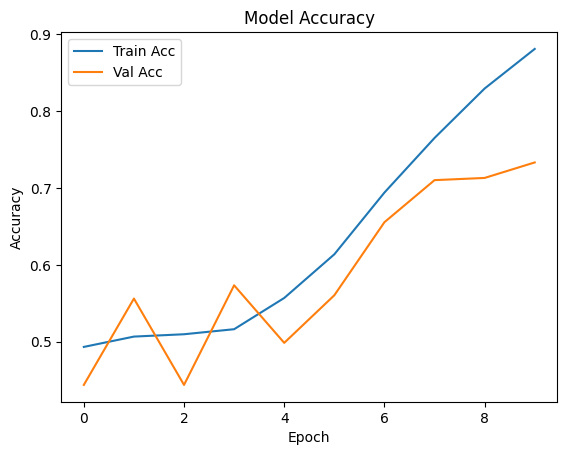

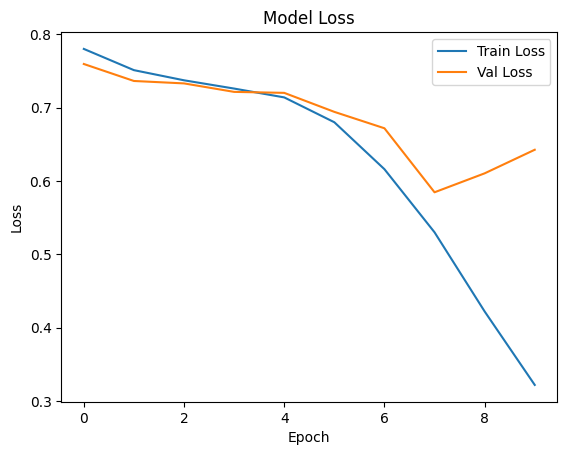

In [69]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [65]:
'''import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.utils import shuffle

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, SpatialDropout1D, Bidirectional, LSTM,
    Dense, Dropout, BatchNormalization
)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Download punkt_tab resource
from nltk.tokenize import word_tokenize

# ✅ Prepare data
X = df['posts']
y = df['TF'].values  # Binary: 0 or 1

# ✅ Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# ✅ Tokenization for Word2Vec
# Combine train and test data for Word2Vec training to get a comprehensive vocabulary
all_posts = pd.concat([X_train, X_test], axis=0)
tokenized_posts = [word_tokenize(post.lower()) for post in all_posts]

# ✅ Train Word2Vec model
embedding_dim = 64
word2vec_model = Word2Vec(sentences=tokenized_posts, vector_size=embedding_dim, window=5, min_count=1, workers=4)

# ✅ Tokenization for Keras Embedding layer
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# ✅ Padding
maxlen = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post', truncating='post')

# ✅ Create embedding matrix
word_index = tokenizer.word_index
num_words = min(max_words, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
    if i < num_words:
        if word in word2vec_model.wv:
            embedding_matrix[i] = word2vec_model.wv[word]
        # else: words not in Word2Vec model will have zero embeddings

# ✅ Shuffle training data to remove order bias
X_train_pad, y_train = shuffle(X_train_pad, y_train, random_state=42)

# ✅ Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# ✅ Build model with Word2Vec embedding
model = Sequential([
    Embedding(
        input_dim=num_words,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=maxlen,
        trainable=False # Set to False to use pre-trained embeddings
    ),
    SpatialDropout1D(0.3),
    Bidirectional(LSTM(64, return_sequences=True)),
    BatchNormalization(),
    Bidirectional(LSTM(32)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# ✅ Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# ✅ Training
history = model.fit(
    X_train_pad, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.3,
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr],
    verbose=1,
    shuffle=True
)

# ✅ Predict probabilities on test set
y_probs = model.predict(X_test_pad).flatten()

# ✅ Threshold tuning using F1-score
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"\n🔧 Best threshold: {best_threshold:.4f}")
print(f"📈 Best F1 Score: {f1_scores[best_idx]:.4f}")

# ✅ Evaluate at best threshold
y_pred = (y_probs > best_threshold).astype("int32")
print("\n✅ TF Trait Performance at Optimal Threshold:")
print(pd.DataFrame({
    "Accuracy": [accuracy_score(y_test, y_pred)],
    "Precision": [precision_score(y_test, y_pred, zero_division=0)],
    "Recall": [recall_score(y_test, y_pred, zero_division=0)],
    "F1-score": [f1_score(y_test, y_pred, zero_division=0)]
}).T)

# ✅ Plot Accuracy & Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# ✅ Plot F1 vs Threshold
plt.figure(figsize=(10, 5))
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', color='purple')
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f'Best Threshold = {best_threshold:.4f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.grid(True)
plt.legend()
plt.show()'''

ModuleNotFoundError: No module named 'gensim'